# Part 3: NLP using spaCy

According to a team of researchers from the Baruch Ivcher School of Psychology, a <u>high noun-to-verb ratio is a subtle linguistic trait that can reduce anger in response to policies</u>. Source: <a href='https://journals.sagepub.com/doi/abs/10.1177/0956797618772823?journalCode=pssa&'>here</a>.

In this part, we shall use the NLP library spaCy to extract parts-of-speech tags from the speeches, and calculate the noun-to-verb score.

In [1]:
# import libraries
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleaned_speeches = pd.read_csv("part2.csv", index_col = 0)
cleaned_speeches.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,FleschReadingEase
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649


In [3]:
# Get a list of POS tags found in Obama's 2010 speech

nlp = spacy.load('en_core_web_sm')
doc = nlp(cleaned_speeches.speech[0])

pos_obama2010 = []
for token in doc:
    pos_obama2010.append(token.pos_)

In [4]:
from collections import Counter

In [5]:
counter_obama2010 =  Counter(pos_obama2010)
counter_obama2010

Counter({'PROPN': 391,
         'PUNCT': 1347,
         'NOUN': 1521,
         'ADP': 719,
         'ADJ': 550,
         'CCONJ': 311,
         'SPACE': 112,
         'PRON': 950,
         'VERB': 1054,
         'SCONJ': 208,
         'DET': 627,
         'AUX': 554,
         'NUM': 103,
         'ADV': 345,
         'PART': 265,
         'SYM': 13,
         'INTJ': 6})

In [6]:
# Get the value of the key 'NOUN' in the Obama 2010 POS Counter 
print(counter_obama2010["NOUN"])

1521


In [7]:
# Get the counts for NOUN and VERB from speech
noun_list = []
verb_list = []

for key,value in cleaned_speeches.iterrows():

    doc = nlp(value.speech)
    pos = [token.pos_ for token in doc]
    counter = Counter(pos)
    noun_list.append(counter["NOUN"])
    verb_list.append(counter["VERB"])
    
print(noun_list)


[1521, 1473, 1548, 1536, 1538, 1420, 1111, 1042, 1111, 1281]


In [8]:
# Create new NOUN_count and VERB_count columns
cleaned_speeches["NOUN_count"] = noun_list
cleaned_speeches["VERB_count"] = verb_list
cleaned_speeches.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,FleschReadingEase,NOUN_count,VERB_count
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575,1521,1054
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806,1473,1017
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014,1548,1039
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427,1536,1016
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649,1538,1045


In [9]:
# Derive the noun-to-verb ratio

cleaned_speeches = cleaned_speeches.assign(noun_to_verb = lambda x: x.NOUN_count / x.VERB_count)
cleaned_speeches

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,FleschReadingEase,NOUN_count,VERB_count,noun_to_verb
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575,1521,1054,1.443074
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806,1473,1017,1.448378
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014,1548,1039,1.489894
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427,1536,1016,1.511811
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649,1538,1045,1.471770
5,speeches\obama2015.txt,obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40269,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",466,86.414163,13.518314,56.194377,1420,1036,1.370656
6,speeches\obama2016.txt,obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"['Mr', ' Speaker, Mr', "" Vice President, Membe...",305,102.186885,17.441406,25.062509,1111,807,1.376704
7,speeches\trump2018.txt,trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",323,94.294118,13.843611,51.034490,1042,665,1.566917
8,speeches\trump2019.txt,trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"['Madam Speaker, Mr', ' Vice President, Member...",298,103.842282,14.799100,44.106260,1111,633,1.755134
9,speeches\trump2020.txt,trump,2020,Thank you very much. Thank you. Thank you v...,39649,"[' Thank you very much', ' Thank you', ' Tha...",557,71.183124,16.381695,33.439536,1281,774,1.655039


<AxesSubplot:xlabel='name', ylabel='noun_to_verb'>

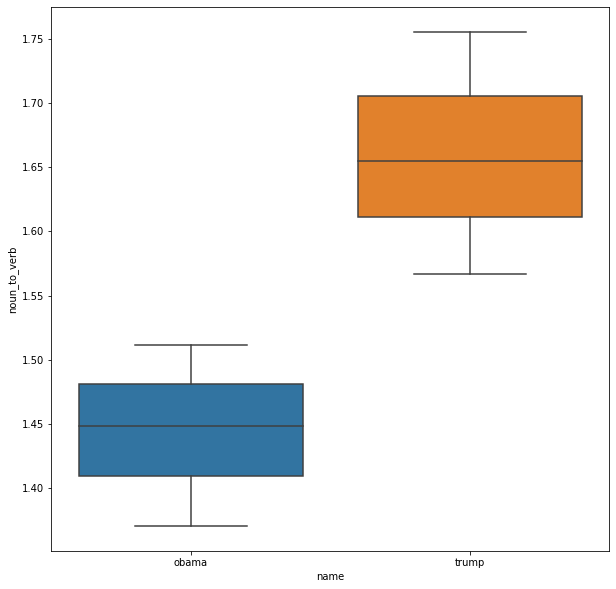

In [10]:
# Compare the two politicians' noun-to-verb ratio
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = cleaned_speeches, x = "name", y = "noun_to_verb")

# Conclusion

We see that Trump has a higher noun-to-verb ratio than Obama for his State of the Union speeches, signalling that the way Trump structures his sentences may actually reduce anger in response to his policies. For such a controversial President like Trump, this is a piece of valuable insight suggesting how he manages to bring his policies into fruition. 